In [ ]:
import pandas as pd
from matplotlib import pyplot
import numpy
import seaborn as sns 

In [ ]:
from google.colab import files
file=files.upload()

Saving bread_file.csv to bread_file (1).csv


In [ ]:
df=pd.read_csv('bread_file.csv', encoding='latin-1')

df

,breads data-Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,moisture (%),ash (%),protein (%),fat (%),fiber (%),hardness (g),chewiness (g),cohessiveness,gumminess (g),springness,HEIGHT (mm),LENGTH (mm),WIDTH (mm),Loaf Volume (cm3 ),Specific Loaf Volume (cm3 / gm),Total phenolic content\nmg equivalent gallic a...,Samples,% Discoloration,Hydrolysis index (HI),predicted glycemic index (pGI),cmax,Rate of hydrolysis (K)
1,samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0%,29.29,1.98,10.94,9.56,0.295,135.4,72.8,1.05,12.24,0.52,64.23,126.48,63.35,521.038,3.817,22.72,0%,1.402,19.60,50.472,17.366,1.260
3,5%,29,2.69,10.27,9.40,0.324,137.1,54.12,0.97,40.22,0.31,61.72,126.45,60.93,475.068,21.083,26.88,5%,1.945,13.214,46.965,12.20,1.260
4,10%,31.09,2.77,9.77,9.76,0.439,183.35,31.7,0.43,28.69,0.31,60.29,127.39,58.03,445.076,3.248,28.80,10%,"2,252",12.33,46.487,10.97,1.261
5,15%,31.94,1.92,9.20,9.34,1.035,195.65,13.8,0.12,33.82,0.21,61.31,126.27,59.12,457.13,3.303,31.14,15%,2.585,10.50,45.475,9.97,1.203
6,20%,32.87,2.38,9.14,8.30,1.242,163.39,36.65,0.13,12.35,0.34,60.25,126.33,58.63,446.509,3.203,37.34,20%,3.042,10.23,45.213,0.54,1.191


In [ ]:
columns=['samples', 'moisture', 'ash', 'protein', 'fat', 'fiber', 'hardness', 'chewiness', 'cohessiveness', 'gumminess', 'springness', 'HEIGHT', 'LENGTH ', 'WIDTH', 'Loaf_Volume', 'Specific_Loaf_Volume', 'Total_phenolic_content', 'Samples', 'Discoloration', 'Hydrolysis_index', 'pGI', 'cmax', 'hydrolysis_rate']

In [ ]:
df.columns=columns

In [ ]:
df

,samples,moisture,ash,protein,fat,fiber,hardness,chewiness,cohessiveness,gumminess,springness,HEIGHT,LENGTH,WIDTH,Loaf_Volume,Specific_Loaf_Volume,Total_phenolic_content,Samples,Discoloration,Hydrolysis_index,pGI,cmax,hydrolysis_rate
0,NaN,moisture (%),ash (%),protein (%),fat (%),fiber (%),hardness (g),chewiness (g),cohessiveness,gumminess (g),springness,HEIGHT (mm),LENGTH (mm),WIDTH (mm),Loaf Volume (cm3 ),Specific Loaf Volume (cm3 / gm),Total phenolic content\nmg equivalent gallic a...,Samples,% Discoloration,Hydrolysis index (HI),predicted glycemic index (pGI),cmax,Rate of hydrolysis (K)
1,samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0%,29.29,1.98,10.94,9.56,0.295,135.4,72.8,1.05,12.24,0.52,64.23,126.48,63.35,521.038,3.817,22.72,0%,1.402,19.60,50.472,17.366,1.260
3,5%,29,2.69,10.27,9.40,0.324,137.1,54.12,0.97,40.22,0.31,61.72,126.45,60.93,475.068,21.083,26.88,5%,1.945,13.214,46.965,12.20,1.260
4,10%,31.09,2.77,9.77,9.76,0.439,183.35,31.7,0.43,28.69,0.31,60.29,127.39,58.03,445.076,3.248,28.80,10%,"2,252",12.33,46.487,10.97,1.261
5,15%,31.94,1.92,9.20,9.34,1.035,195.65,13.8,0.12,33.82,0.21,61.31,126.27,59.12,457.13,3.303,31.14,15%,2.585,10.50,45.475,9.97,1.203
6,20%,32.87,2.38,9.14,8.30,1.242,163.39,36.65,0.13,12.35,0.34,60.25,126.33,58.63,446.509,3.203,37.34,20%,3.042,10.23,45.213,0.54,1.191


In [ ]:
df2=df.drop(0)
df2

,samples,moisture,ash,protein,fat,fiber,hardness,chewiness,cohessiveness,gumminess,springness,HEIGHT,LENGTH,WIDTH,Loaf_Volume,Specific_Loaf_Volume,Total_phenolic_content,Samples,Discoloration,Hydrolysis_index,pGI,cmax,hydrolysis_rate
1,samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0%,29.29,1.98,10.94,9.56,0.295,135.4,72.8,1.05,12.24,0.52,64.23,126.48,63.35,521.038,3.817,22.72,0%,1.402,19.60,50.472,17.366,1.260
3,5%,29,2.69,10.27,9.40,0.324,137.1,54.12,0.97,40.22,0.31,61.72,126.45,60.93,475.068,21.083,26.88,5%,1.945,13.214,46.965,12.20,1.260
4,10%,31.09,2.77,9.77,9.76,0.439,183.35,31.7,0.43,28.69,0.31,60.29,127.39,58.03,445.076,3.248,28.80,10%,"2,252",12.33,46.487,10.97,1.261
5,15%,31.94,1.92,9.20,9.34,1.035,195.65,13.8,0.12,33.82,0.21,61.31,126.27,59.12,457.13,3.303,31.14,15%,2.585,10.50,45.475,9.97,1.203
6,20%,32.87,2.38,9.14,8.30,1.242,163.39,36.65,0.13,12.35,0.34,60.25,126.33,58.63,446.509,3.203,37.34,20%,3.042,10.23,45.213,0.54,1.191


In [ ]:
df3=df2.drop(1)
df3

,samples,moisture,ash,protein,fat,fiber,hardness,chewiness,cohessiveness,gumminess,springness,HEIGHT,LENGTH,WIDTH,Loaf_Volume,Specific_Loaf_Volume,Total_phenolic_content,Samples,Discoloration,Hydrolysis_index,pGI,cmax,hydrolysis_rate
2,0%,29.29,1.98,10.94,9.56,0.295,135.4,72.8,1.05,12.24,0.52,64.23,126.48,63.35,521.038,3.817,22.72,0%,1.402,19.60,50.472,17.366,1.260
3,5%,29,2.69,10.27,9.40,0.324,137.1,54.12,0.97,40.22,0.31,61.72,126.45,60.93,475.068,21.083,26.88,5%,1.945,13.214,46.965,12.20,1.260
4,10%,31.09,2.77,9.77,9.76,0.439,183.35,31.7,0.43,28.69,0.31,60.29,127.39,58.03,445.076,3.248,28.80,10%,"2,252",12.33,46.487,10.97,1.261
5,15%,31.94,1.92,9.20,9.34,1.035,195.65,13.8,0.12,33.82,0.21,61.31,126.27,59.12,457.13,3.303,31.14,15%,2.585,10.50,45.475,9.97,1.203
6,20%,32.87,2.38,9.14,8.30,1.242,163.39,36.65,0.13,12.35,0.34,60.25,126.33,58.63,446.509,3.203,37.34,20%,3.042,10.23,45.213,0.54,1.191


In [ ]:
from sklearn import preprocessing

In [ ]:
df3['samples']=[0, 0.05, 0.1, 0.15, 0.20]

df3

,samples,moisture,ash,protein,fat,fiber,hardness,chewiness,cohessiveness,gumminess,springness,HEIGHT,LENGTH,WIDTH,Loaf_Volume,Specific_Loaf_Volume,Total_phenolic_content,Samples,Discoloration,Hydrolysis_index,pGI,cmax,hydrolysis_rate
2,0.00,29.29,1.98,10.94,9.56,0.295,135.4,72.8,1.05,12.24,0.52,64.23,126.48,63.35,521.038,3.817,22.72,0%,1.402,19.60,50.472,17.366,1.260
3,0.05,29,2.69,10.27,9.40,0.324,137.1,54.12,0.97,40.22,0.31,61.72,126.45,60.93,475.068,21.083,26.88,5%,1.945,13.214,46.965,12.20,1.260
4,0.10,31.09,2.77,9.77,9.76,0.439,183.35,31.7,0.43,28.69,0.31,60.29,127.39,58.03,445.076,3.248,28.80,10%,"2,252",12.33,46.487,10.97,1.261
5,0.15,31.94,1.92,9.20,9.34,1.035,195.65,13.8,0.12,33.82,0.21,61.31,126.27,59.12,457.13,3.303,31.14,15%,2.585,10.50,45.475,9.97,1.203
6,0.20,32.87,2.38,9.14,8.30,1.242,163.39,36.65,0.13,12.35,0.34,60.25,126.33,58.63,446.509,3.203,37.34,20%,3.042,10.23,45.213,0.54,1.191


In [ ]:
df4=df3.drop(['Samples'], axis = 1)
df4

,samples,moisture,ash,protein,fat,fiber,hardness,chewiness,cohessiveness,gumminess,springness,HEIGHT,LENGTH,WIDTH,Loaf_Volume,Specific_Loaf_Volume,Total_phenolic_content,Discoloration,Hydrolysis_index,pGI,cmax,hydrolysis_rate
2,0.00,29.29,1.98,10.94,9.56,0.295,135.4,72.8,1.05,12.24,0.52,64.23,126.48,63.35,521.038,3.817,22.72,1.402,19.60,50.472,17.366,1.260
3,0.05,29,2.69,10.27,9.40,0.324,137.1,54.12,0.97,40.22,0.31,61.72,126.45,60.93,475.068,21.083,26.88,1.945,13.214,46.965,12.20,1.260
4,0.10,31.09,2.77,9.77,9.76,0.439,183.35,31.7,0.43,28.69,0.31,60.29,127.39,58.03,445.076,3.248,28.80,"2,252",12.33,46.487,10.97,1.261
5,0.15,31.94,1.92,9.20,9.34,1.035,195.65,13.8,0.12,33.82,0.21,61.31,126.27,59.12,457.13,3.303,31.14,2.585,10.50,45.475,9.97,1.203
6,0.20,32.87,2.38,9.14,8.30,1.242,163.39,36.65,0.13,12.35,0.34,60.25,126.33,58.63,446.509,3.203,37.34,3.042,10.23,45.213,0.54,1.191


In [ ]:
df4['Discoloration'][4]=2.252

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4_b=df4.drop(['samples'], axis = 1)

In [ ]:
df4_b

,moisture,ash,protein,fat,fiber,hardness,chewiness,cohessiveness,gumminess,springness,HEIGHT,LENGTH,WIDTH,Loaf_Volume,Specific_Loaf_Volume,Total_phenolic_content,Discoloration,Hydrolysis_index,pGI,cmax,hydrolysis_rate
2,29.29,1.98,10.94,9.56,0.295,135.4,72.8,1.05,12.24,0.52,64.23,126.48,63.35,521.038,3.817,22.72,1.402,19.60,50.472,17.366,1.260
3,29,2.69,10.27,9.40,0.324,137.1,54.12,0.97,40.22,0.31,61.72,126.45,60.93,475.068,21.083,26.88,1.945,13.214,46.965,12.20,1.260
4,31.09,2.77,9.77,9.76,0.439,183.35,31.7,0.43,28.69,0.31,60.29,127.39,58.03,445.076,3.248,28.80,2.252,12.33,46.487,10.97,1.261
5,31.94,1.92,9.20,9.34,1.035,195.65,13.8,0.12,33.82,0.21,61.31,126.27,59.12,457.13,3.303,31.14,2.585,10.50,45.475,9.97,1.203
6,32.87,2.38,9.14,8.30,1.242,163.39,36.65,0.13,12.35,0.34,60.25,126.33,58.63,446.509,3.203,37.34,3.042,10.23,45.213,0.54,1.191


**NORMALIZE**

In [ ]:
x = df4_b.values
x

array([['29.29', '1.98', '10.94', '9.56', '0.295', '135.4', '72.8',
        '1.05', '12.24', '0.52', '64.23', '126.48', '63.35', '521.038',
        '3.817', '22.72', '1.402', '19.60', '50.472', '17.366', '1.260'],
       ['29', '2.69', '10.27', '9.40', '0.324', '137.1', '54.12', '0.97',
        '40.22', '0.31', '61.72', '126.45', '60.93', '475.068', '21.083',
        '26.88', '1.945', '13.214', '46.965', '12.20', '1.260'],
       ['31.09', '2.77', '9.77', '9.76', '0.439', '183.35', '31.7',
        '0.43', '28.69', '0.31', '60.29', '127.39', '58.03', '445.076',
        '3.248', '28.80', 2.252, '12.33', '46.487', '10.97', '1.261'],
       ['31.94', '1.92', '9.20', '9.34', '1.035', '195.65', '13.8',
        '0.12', '33.82', '0.21', '61.31', '126.27', '59.12', '457.13',
        '3.303', '31.14', '2.585', '10.50', '45.475', '9.97', '1.203'],
       ['32.87', '2.38', '9.14', '8.30', '1.242', '163.39', '36.65',
        '0.13', '12.35', '0.34', '60.25', '126.33', '58.63', '446.509',
        '3

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled

array([[0.0749354 , 0.07058824, 1.        , 0.8630137 , 0.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.1875    , 1.        , 1.        , 0.03434004,
        0.        , 0.        , 1.        , 1.        , 1.        ,
        0.98571429],
       [0.        , 0.90588235, 0.62777778, 0.75342466, 0.03062302,
        0.02821577, 0.68338983, 0.91397849, 1.        , 0.32258065,
        0.36934673, 0.16071429, 0.54511278, 0.39482899, 1.        ,
        0.28454172, 0.33109756, 0.31846318, 0.33314318, 0.69297516,
        0.98571429],
       [0.54005168, 1.        , 0.35      , 1.        , 0.15205913,
        0.79585062, 0.30338983, 0.33333333, 0.58791994, 0.32258065,
        0.01005025, 1.        , 0.        , 0.        , 0.00251678,
        0.41586867, 0.51829268, 0.22411953, 0.24225138, 0.619874  ,
        1.        ],
       [0.75968992, 0.        , 0.03333333, 0.71232877, 0.78141499,
        1.        , 0.        , 0.        , 0.7712651

In [ ]:
df5=pd.DataFrame(x_scaled, columns=df4_b.columns,index=[0, 5, 10, 15, 20] )
df5

,moisture,ash,protein,fat,fiber,hardness,chewiness,cohessiveness,gumminess,springness,HEIGHT,LENGTH,WIDTH,Loaf_Volume,Specific_Loaf_Volume,Total_phenolic_content,Discoloration,Hydrolysis_index,pGI,cmax,hydrolysis_rate
0,0.074935,0.070588,1.000000,0.863014,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.187500,1.000000,1.000000,0.034340,0.000000,0.000000,1.000000,1.000000,1.000000,0.985714
5,0.000000,0.905882,0.627778,0.753425,0.030623,0.028216,0.683390,0.913978,1.000000,0.322581,0.369347,0.160714,0.545113,0.394829,1.000000,0.284542,0.331098,0.318463,0.333143,0.692975,0.985714
10,0.540052,1.000000,0.350000,1.000000,0.152059,0.795851,0.303390,0.333333,0.587920,0.322581,0.010050,1.000000,0.000000,0.000000,0.002517,0.415869,0.518293,0.224120,0.242251,0.619874,1.000000
15,0.759690,0.000000,0.033333,0.712329,0.781415,1.000000,0.000000,0.000000,0.771265,0.000000,0.266332,0.000000,0.204887,0.158685,0.005593,0.575923,0.721341,0.028815,0.049819,0.560442,0.171429
20,1.000000,0.541176,0.000000,0.000000,1.000000,0.464564,0.387288,0.010753,0.003931,0.419355,0.000000,0.053571,0.112782,0.018865,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


**STANDARDIZE**

In [ ]:
sd_scaler = preprocessing.StandardScaler()
x2_scaled=sd_scaler.fit_transform(x)
x2_scaled

array([[-1.03515721, -1.04956244,  1.58767702,  0.56768637, -0.94545083,
        -1.14258262,  1.53958739,  1.27372691, -1.1644703 ,  1.8006568 ,
         1.83845236, -0.25350476,  1.72979468,  1.84945902, -0.4398295 ,
        -1.37360605, -1.51369633,  1.88935908,  1.88085828,  1.30965152,
         0.79973901],
       [-1.22908201,  0.97540857,  0.59906772,  0.25230505, -0.87174633,
        -1.07215001,  0.61144266,  1.07392661,  1.29937415, -0.27702412,
         0.11016943, -0.32663113,  0.47571945,  0.21678326,  1.99902211,
        -0.51510227, -0.53891323,  0.01152694,  0.02257284,  0.36430447,
         0.79973901],
       [ 0.16851396,  1.20357432, -0.13870041,  0.96191301, -0.57946986,
         0.84403123, -0.50252975, -0.27472541,  0.28407299, -0.27702412,
        -0.87446985,  1.9646619 , -1.02709798, -0.84841604, -0.52020171,
        -0.11886975,  0.01220723, -0.24841726, -0.23070929,  0.13922184,
         0.83172857],
       [ 0.73691424, -1.22068675, -0.97975608,  0.13403706

In [ ]:
df6=pd.DataFrame(x2_scaled, columns=df4_b.columns,  index=[0, 5, 10, 15, 20])
df6

,moisture,ash,protein,fat,fiber,hardness,chewiness,cohessiveness,gumminess,springness,HEIGHT,LENGTH,WIDTH,Loaf_Volume,Specific_Loaf_Volume,Total_phenolic_content,Discoloration,Hydrolysis_index,pGI,cmax,hydrolysis_rate
0,-1.035157,-1.049562,1.587677,0.567686,-0.945451,-1.142583,1.539587,1.273727,-1.164470,1.800657,1.838452,-0.253505,1.729795,1.849459,-0.439829,-1.373606,-1.513696,1.889359,1.880858,1.309652,0.799739
5,-1.229082,0.975409,0.599068,0.252305,-0.871746,-1.072150,0.611443,1.073927,1.299374,-0.277024,0.110169,-0.326631,0.475719,0.216783,1.999022,-0.515102,-0.538913,0.011527,0.022573,0.364304,0.799739
10,0.168514,1.203574,-0.138700,0.961913,-0.579470,0.844031,-0.502530,-0.274725,0.284073,-0.277024,-0.874470,1.964662,-1.027098,-0.848416,-0.520202,-0.118870,0.012207,-0.248417,-0.230709,0.139222,0.831729
15,0.736914,-1.220687,-0.979756,0.134037,0.935285,1.353632,-1.391919,-1.048952,0.735807,-1.266396,-0.172140,-0.765389,-0.462246,-0.420305,-0.512433,0.364039,0.610002,-0.786537,-0.766947,-0.043772,-1.023666
20,1.358811,0.091266,-1.068288,-1.915941,1.461382,0.017070,-0.256581,-1.023977,-1.154784,0.019787,-0.902012,-0.619137,-0.716170,-0.797521,-0.526558,1.643539,1.430400,-0.865932,-0.905775,-1.769406,-1.407541


**EDA**

Text(0, 0.5, 'value')

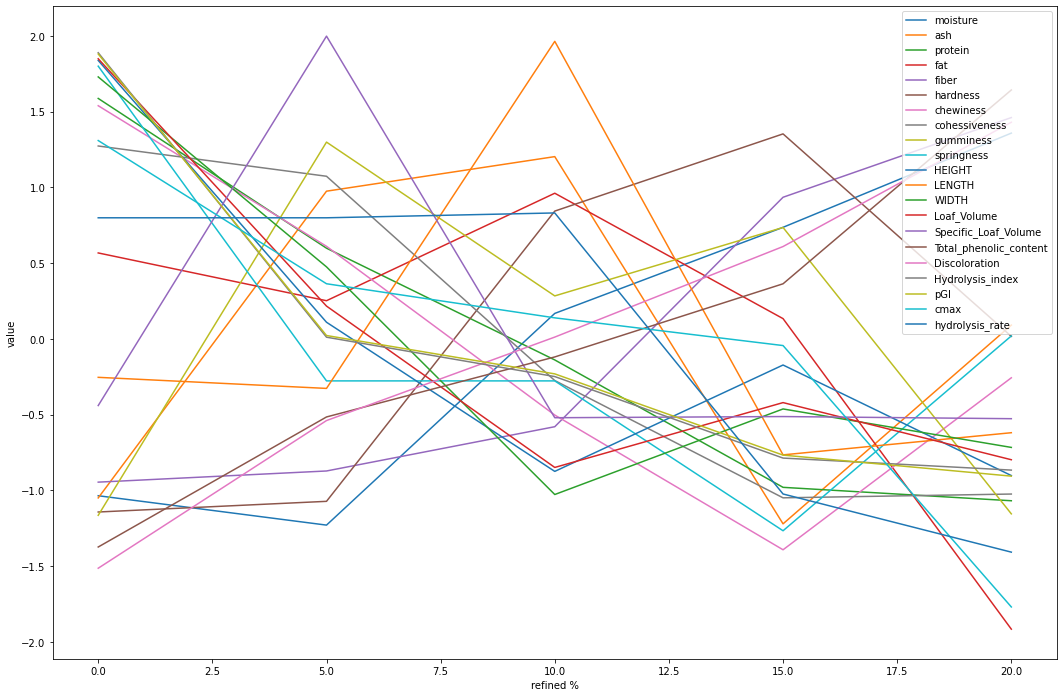

In [ ]:
s_plot=df6.plot(figsize=(18,12))
s_plot.set_xlabel("refined %")
s_plot.set_ylabel("value")

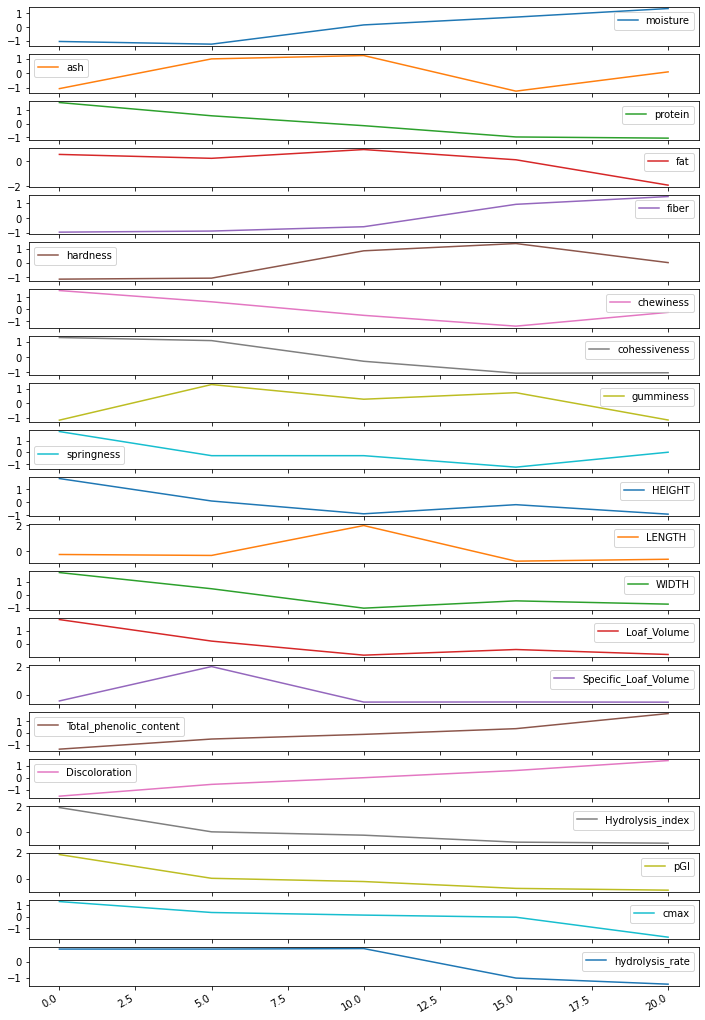

In [ ]:

axes = df6.plot.line(subplots=True, figsize=(12,20))


In [ ]:
df6=df6.drop(['Cluster'], axis = 1)

**CLUSTER**

In [ ]:
d_array=df6.values
d_array

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cl=kmeans = KMeans(n_clusters=2).fit(df6)
cl

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centroids = cl.cluster_centers_
print(centroids)

[[ 0.75474641  0.02471796 -0.72891491 -0.27333047  0.60573238  0.73824421
  -0.71701002 -0.78255117 -0.04496795 -0.50787756 -0.6495406   0.19337863
  -0.73517138 -0.68874743 -0.51973087  0.62956944  0.68420319 -0.63362867
  -0.63447704 -0.55798533 -0.53315934]
 [-1.13211961 -0.03707693  1.09337237  0.40999571 -0.90859858 -1.10736632
   1.07551503  1.17382676  0.06745192  0.76181634  0.97431089 -0.29006795
   1.10275707  1.03312114  0.7795963  -0.94435416 -1.02630478  0.95044301
   0.95171556  0.836978    0.79973901]]


**CONTINUE** THIS 

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
model = TSNE(learning_rate = 100)
features = [a  for a in df6.columns]
x_=df6[features]
y_=[0,5,10,15,20]
y_

[0, 5, 10, 15, 20]

In [ ]:
columns=['moisture', 'ash', 'protein', 'fat', 'fiber', 'hardness', 'chewiness', 'cohessiveness', 'gumminess', 'springness', 'HEIGHT', 'LENGTH ', 'WIDTH', 'Loaf_Volume', 'Specific_Loaf_Volume', 'Total_phenolic_content', 'Discoloration', 'Hydrolysis_index', 'pGI', 'cmax', 'hydrolysis_rate']
df6[columns]

,moisture,ash,protein,fat,fiber,hardness,chewiness,cohessiveness,gumminess,springness,HEIGHT,LENGTH,WIDTH,Loaf_Volume,Specific_Loaf_Volume,Total_phenolic_content,Discoloration,Hydrolysis_index,pGI,cmax,hydrolysis_rate
0,-1.035157,-1.049562,1.587677,0.567686,-0.945451,-1.142583,1.539587,1.273727,-1.164470,1.800657,1.838452,-0.253505,1.729795,1.849459,-0.439829,-1.373606,-1.513696,1.889359,1.880858,1.309652,0.799739
5,-1.229082,0.975409,0.599068,0.252305,-0.871746,-1.072150,0.611443,1.073927,1.299374,-0.277024,0.110169,-0.326631,0.475719,0.216783,1.999022,-0.515102,-0.538913,0.011527,0.022573,0.364304,0.799739
10,0.168514,1.203574,-0.138700,0.961913,-0.579470,0.844031,-0.502530,-0.274725,0.284073,-0.277024,-0.874470,1.964662,-1.027098,-0.848416,-0.520202,-0.118870,0.012207,-0.248417,-0.230709,0.139222,0.831729
15,0.736914,-1.220687,-0.979756,0.134037,0.935285,1.353632,-1.391919,-1.048952,0.735807,-1.266396,-0.172140,-0.765389,-0.462246,-0.420305,-0.512433,0.364039,0.610002,-0.786537,-0.766947,-0.043772,-1.023666
20,1.358811,0.091266,-1.068288,-1.915941,1.461382,0.017070,-0.256581,-1.023977,-1.154784,0.019787,-0.902012,-0.619137,-0.716170,-0.797521,-0.526558,1.643539,1.430400,-0.865932,-0.905775,-1.769406,-1.407541


In [ ]:
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
df8= pd.DataFrame(Data,columns=['x','y'])

[[43.2        16.7       ]
 [30.83333333 74.66666667]
 [27.75       55.        ]
 [55.1        46.1       ]]


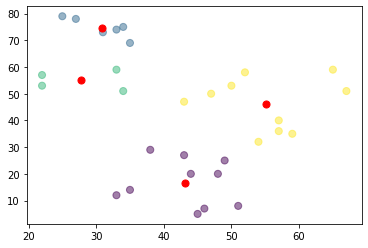

In [ ]:
kmeans = KMeans(n_clusters=4).fit(df8)
centroids = kmeans.cluster_centers_
print(centroids)

pyplot.scatter(df8['x'], df8['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
pyplot.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
pyplot.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(d_array)
kmeans.labels_

array([1, 1, 0, 0, 0], dtype=int32)

**WITH SEABORN**

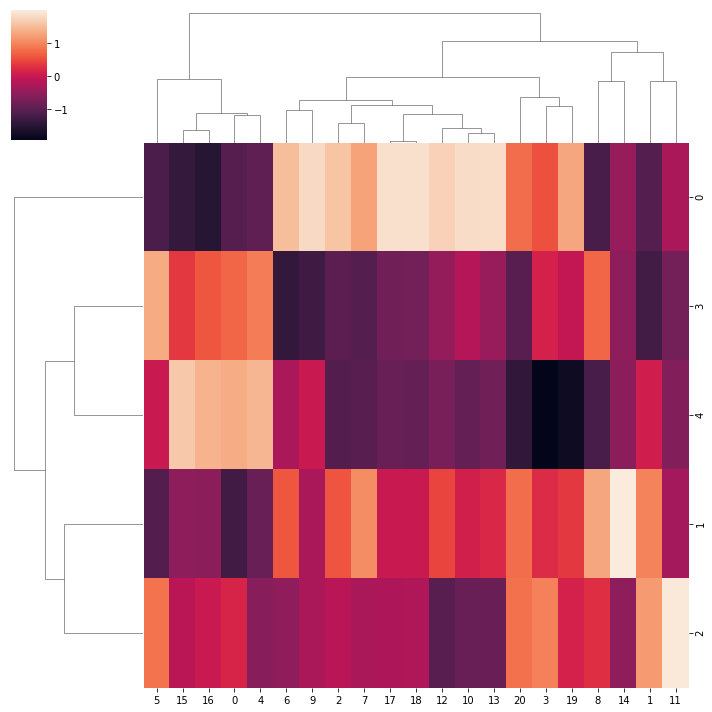

In [ ]:
g = sns.clustermap(d_array)
